# Tipos de matrices especiales

## Matriz diagonal

**Matriz diagonal:** $\;\mathbf{D}=\operatorname{diag}(d_1,\dotsc,d_n)\in\mathbb{R}^{n\times n}$ con ceros fuera de la diagonal

**Construcción y extracción de una matriz diagonal:** $\;\mathbf{D}=\operatorname{diag}(\boldsymbol{d})\;$ y $\;\boldsymbol{d}=\operatorname{diag}(\mathbf{D})$

**Matriz identidad:** $\;\mathbf{I}=\operatorname{diag}(1,\dotsc,1)\in\mathbb{R}^{n\times n}$ con unos en diagonal y ceros fuera

**Matriz diagonal por bloques:** $\;\begin{pmatrix} \mathbf{A} & \boldsymbol{0}\\\boldsymbol{0} & \mathbf{B}\end{pmatrix}$

**Matriz banda-diagonal:** $\;$ con elementos no nulos en una banda de ancho $k$ centrada en la diagonal; **tridiagonal** si $k=3$

In [1]:
import numpy as np
print("Construcción:\n", np.diag([1, 2]))
print("Extracción: ", np.diag(np.array([[1, 0], [0, 2]])))
print("Identidad:\n", np.eye(2))

Construcción:
 [[1 0]
 [0 2]]
Extracción:  [1 2]
Identidad:
 [[1. 0.]
 [0. 1.]]


## Matrices triangulares

**Matriz triangular superior:** $\;$ solo tiene elementos no nulos en la diagonal y por encima

**Matriz triangular inferior:** $\;$ solo tiene elementos no nulos en la diagonal y por debajo

**Propiedades:** $\;$ valores propios en la diagonal, por lo que $\lvert\mathbf{A}\rvert=\prod_iA_{ii}$

In [2]:
import numpy as np
A = np.arange(1, 5).reshape((2, 2))
print(A, "\n", np.tril(A), "\n", np.triu(A))

[[1 2]
 [3 4]] 
 [[1 0]
 [3 4]] 
 [[1 2]
 [0 4]]


## Matrices definidas positivas

**Forma cuadrática** asociada a una matriz real y simétrica, $\mathbf{A}\in\mathbb{R}^{n\times n}$:
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}%
=\sum_{i=1}^n\sum_{j=1}^nA_{ij}x_ix_j$$

$\mathbf{A}$ **definida positiva** ($\mathbf{A}\succ 0$ o $\mathbf{A}> 0$) $\quad$ sii $\quad$ $f(\boldsymbol{x})>0\;$ para todo $\boldsymbol{x}$ no nulo

$\mathbf{A}$ **semi-definida positiva** ($\mathbf{A}\succeq 0$ o $\mathbf{A}\geq 0$) $\quad$ sii $\quad$ $f(\boldsymbol{x})\geq 0\;$ para todo $\boldsymbol{x}$ no nulo

$\mathbf{A}$ **definida negativa** ($\mathbf{A}\prec 0$ o $\mathbf{A}> 0$) $\quad$ sii $\quad$ $f(\boldsymbol{x})<0\;$ para todo $\boldsymbol{x}$ no nulo

$\mathbf{A}$ **semi-definida negativa** ($\mathbf{A}\preceq 0$ o $\mathbf{A}\leq 0$) $\quad$ sii $\quad$ $f(\boldsymbol{x})\leq 0\;$ para todo $\boldsymbol{x}$ no nulo

$\mathbf{A}$ **indefinida** si no es semi-definida positiva ni semi-definida negativa

**Relación entre $\mathbf{A}$ y $-\mathbf{A}$:** $\qquad\mathbf{A}\succ 0\;$ sii $\;-\mathbf{A}\prec 0$ $\qquad\mathbf{A}\succeq 0\;$ sii $\;-\mathbf{A}\preceq 0$ $\qquad\mathbf{A}\;$ indefinida sii $\;-\mathbf{A}\;$ indefinida

**Condición suficiente para $\mathbf{A}\succ 0$:** $\;\mathbf{A}$ diagonalmente dominante, $\;\lvert{a_{ii}}\rvert>\sum\nolimits_{j\neq i}\lvert{a_{ij}}\rvert\;$ para todo $i$, y diagonal positiva

**Condición necesaria y suficiente para $\mathbf{A}\succ 0$:** $\;$ valores propios positivos; por ejemplo, si $\mathbf{A}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)\;$ con $\;\{\lambda_i>0\}$
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}=\sum_{i=1}^n\lambda_ix_i^2>0$$

**Matriz de Gram de $\mathbf{A}\in\mathbb{R}^{m\times n}$:** $\;\mathbf{G}=\mathbf{A}^t\mathbf{A}\;$ en general semi-definida positiva; definida positiva si $m\geq n$ y de rango completo 

**Ejemplo:** $\;$ si $\;\mathbf{A}=\operatorname{diag}(\lambda_1, \lambda_2)=\operatorname{diag}(1, 4),\;$ el conjunto de nivel $C_k$ para $f$, $C_k=\{\boldsymbol{x}: f(\boldsymbol{x})=k\}$, es una elipse centrada en el origen de semiejes alineados con los ejes canónicos y longitudes $\;\{\sqrt{k/\lambda_i}\}$

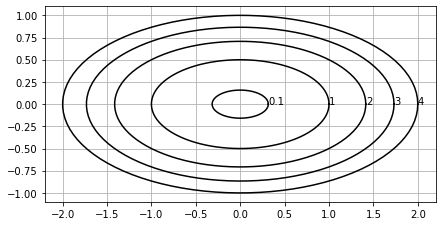

In [3]:
import numpy as np
import matplotlib.pyplot as plt
A = np.diag([1, 4])
t = np.linspace(0, 2.0 * np.pi, 100)
circ = np.array([np.cos(t), np.sin(t)]).T
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(aspect='equal'); ax.grid()
for k in (.1, 1, 2, 3, 4):
    semiaxes = np.sqrt(k * np.linalg.inv(A))
    C = circ @ semiaxes # C @ A @ C.T = k
    plt.plot(C[:, 0], C[:, 1], color='black')
    plt.annotate(k, xy=(C[0]))

## Matrices ortogonales

**Vectores ortogonales:** $\;\boldsymbol{x},\boldsymbol{y}\in\mathbb{R}^n\;$ son ortogonales si $\;\boldsymbol{x}^t\boldsymbol{y}=0$

**Vector normalizado:** $\;\boldsymbol{x}\in\mathbb{R}^n\;$ está normalizado si $\;\lVert\boldsymbol{x}\rVert_2=1$

**Conjunto de vectores ortonormal:** $\;$ si son ortogonales dos a dos y normalizados

**Matriz ortogonal $\mathbf{U}\in\mathbb{R}^{n\times n}$:** $\;$ si el conjunto de sus columnas (o filas) es ortonormal

**Caracterización de matriz ortogonal:** $\quad\mathbf{U}$ ortogonal $\quad$ sii $\quad\mathbf{U}^t\mathbf{U}=\mathbf{I}=\mathbf{U}\mathbf{U}^t\quad$ sii $\quad\mathbf{U}^t=\mathbf{U}^{-1}$

**Propiedades de las transformaciones ortogonales:** $\;$ preservan longitudes y ángulos
$$\begin{align*}
\lVert{\mathbf{U}\boldsymbol{x}}\rVert_2&=\lVert{\boldsymbol{x}}\rVert_2\\%
\cos(\alpha(\mathbf{U}\boldsymbol{x},\mathbf{U}\boldsymbol{y}))&=\frac{(\mathbf{U}\boldsymbol{x})^t(\mathbf{U}\boldsymbol{y})}{\lVert{\mathbf{U}\boldsymbol{x}}\rVert\lVert{\mathbf{U}\boldsymbol{y}}\rVert}=\frac{\boldsymbol{x}^t\boldsymbol{y}}{\lVert{\boldsymbol{x}}\rVert\lVert{\boldsymbol{y}}\rVert}=\cos(\alpha(\boldsymbol{x},\boldsymbol{y}))%
\end{align*}$$

**Ejemplo (cont.):** $\;$ matriz ortogonal de rotación 2d de $\alpha$ radianes en sentido antihorario, $\;\mathbf{R}(\alpha)=\begin{pmatrix}\cos(\alpha)&-\sin(\alpha)\\\sin(\alpha)&\cos(\alpha)\end{pmatrix}$

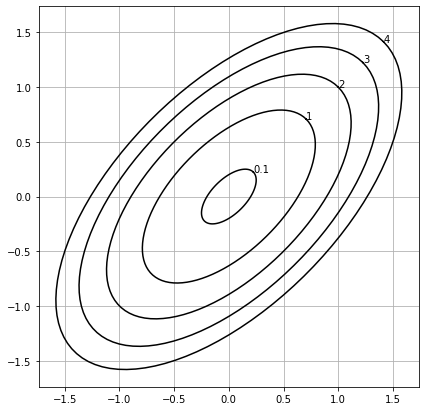

In [4]:
import numpy as np
import matplotlib.pyplot as plt
A = np.diag([1, 4])
t = np.linspace(0, 2.0 * np.pi, 100)
circ = np.array([np.cos(t), np.sin(t)]).T
alpha = np.pi / 4
R = np.array([ [np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)] ])
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(aspect='equal'); ax.grid()
for k in (.1, 1, 2, 3, 4):
    semiaxes = np.sqrt(k * np.linalg.inv(A))
    C = circ @ semiaxes # C @ A @ C.T = k
    C = C @ R.T
    plt.plot(C[:, 0], C[:, 1], color='black')
    plt.annotate(k, xy=(C[0]))